# **Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Read Stock Bulletins Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Stock_Bulletins_high=pd.read_csv('/content/drive/MyDrive/high.csv')

In [ ]:
Stock_Bulletins_high.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [ ]:
Stock_Bulletins_high.columns

Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY',
       'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')

In [ ]:
Stock_Bulletins_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   HIGH            28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [ ]:
Stock_Bulletins_high.describe()

,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012.000000,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
mean,131287.967871,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04
std,9043.995400,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05
min,111001.000000,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,131052.000000,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02
50%,131243.000000,2.000000,3.831125e+03,5.873500e+03,9.000000,0.710000,1.180000,2.100000e+03,1.680000,1.912000e+03
75%,141014.000000,2.000000,2.014495e+04,2.843675e+04,25.000000,1.460000,1.550000,9.494250e+03,2.040000,1.038675e+04
max,142041.000000,2.000000,8.868824e+06,5.741963e+06,1700.000000,44.500000,40.000000,1.017951e+06,40.000000,3.600734e+06


In [ ]:
Stock_Bulletins_low=pd.read_csv('/content/drive/MyDrive/low.csv')

In [ ]:
Stock_Bulletins_low.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
LOW               0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [ ]:
Stock_Bulletins_low.columns

Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'LOW', 'BEST_ASK_PRICE', 'BEST_ASK_QTY',
       'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')

In [ ]:
Stock_Bulletins_low.describe()

,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012.000000,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
mean,131287.967871,1.385906,6.312677e+04,4.270346e+04,28.061545,1.680022,1.620775,1.979999e+04,2.113421,2.452341e+04
std,9043.995400,0.750480,3.022558e+05,1.451785e+05,66.231007,4.580905,1.520599,6.742718e+04,1.500857,1.008184e+05
min,111001.000000,0.000000,2.000000e-02,1.000000e+00,1.000000,0.010000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,131052.000000,1.000000,6.398300e+02,1.000000e+03,3.000000,0.370000,1.050000,5.000000e+02,1.550000,4.000000e+02
50%,131243.000000,2.000000,3.831125e+03,5.873500e+03,9.000000,0.690000,1.180000,2.100000e+03,1.680000,1.912000e+03
75%,141014.000000,2.000000,2.014495e+04,2.843675e+04,25.000000,1.432500,1.550000,9.494250e+03,2.040000,1.038675e+04
max,142041.000000,2.000000,8.868824e+06,5.741963e+06,1700.000000,44.040000,40.000000,1.017951e+06,40.000000,3.600734e+06


In [ ]:
Stock_Bulletins_high['TRADE_DATE'] = pd.to_datetime(Stock_Bulletins_high['TRADE_DATE'], format='%d/%m/%Y')
Stock_Bulletins_high.set_index('TRADE_DATE', inplace=True)

# **The Descriptive Analytics**

In [ ]:
trades_Market= Stock_Bulletins_high.groupby('MARKET').size().reset_index(name='frequency')
trades_Market['relative_frequency'] = trades_Market['frequency'] / len(Stock_Bulletins_high)
trades_Market

,MARKET,frequency,relative_frequency
0,0,4569,0.163109
1,1,8064,0.287877
2,2,15379,0.549015


In [ ]:
print('variance=',np.var(Stock_Bulletins_high['VOLUME']))
print('standard deviation=',np.std(Stock_Bulletins_high['VOLUME']))

variance= 91355285832.59985
standard deviation= 302250.369449898


<ipython-input-15-61ecbd600145>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Stock_Bulletins_high.corr()


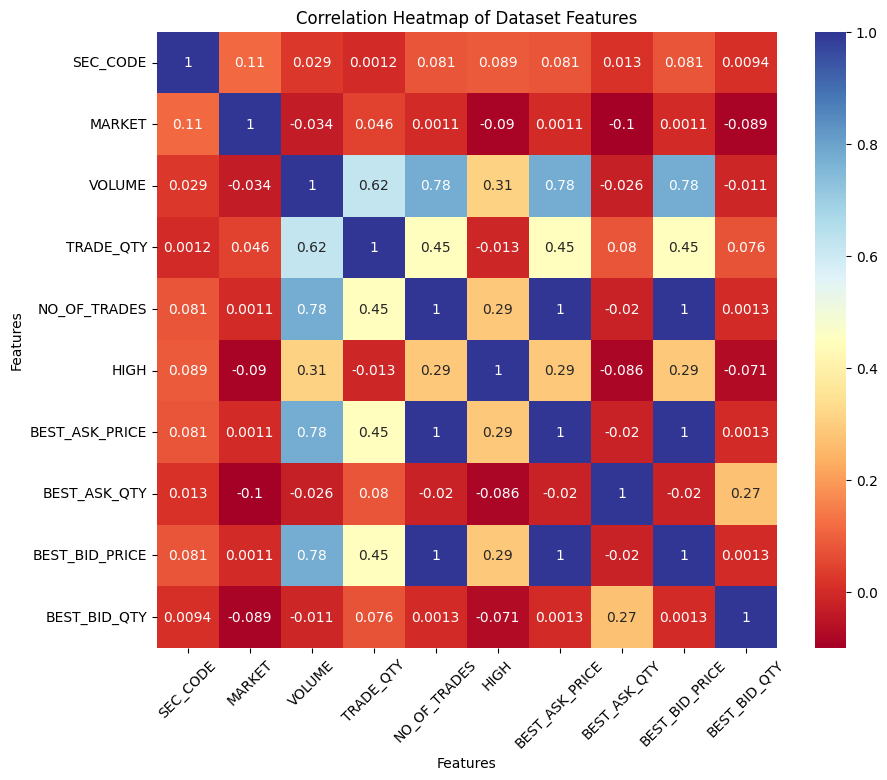

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = Stock_Bulletins_high.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size as desired
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu')

# Set the axis labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of Dataset Features')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


In [ ]:
#q1 = Stock_Bulletins_high['TRADE_QTY'].quantile(0.25)
#q3 = Stock_Bulletins_high['TRADE_QTY'].quantile(0.75)
#iqr = q3 - q1
#Stock_Bulletins_high['outlier_iqr'] = ((Stock_Bulletins_high['TRADE_QTY'] < (q1 - 1.5 * iqr)) | (Stock_Bulletins_high['TRADE_QTY'] > (q3 + 1.5 * iqr)))

#outliers_iqr = Stock_Bulletins_high[Stock_Bulletins_high['outlier_iqr'] == True]
#num_outliers = len(outliers_iqr)
#print("Number of outliers:", num_outliers)

#sns.boxplot(x='TRADE_QTY',data=Stock_Bulletins_high)
#plt.show()

<ipython-input-18-492c5bccf5c4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


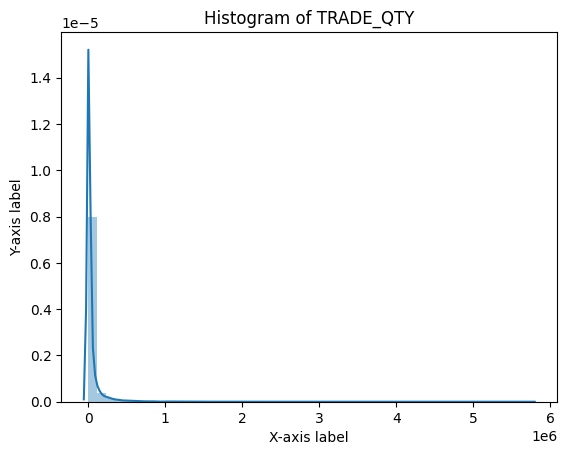

Number of outliers BEFORE: 404


<ipython-input-18-492c5bccf5c4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


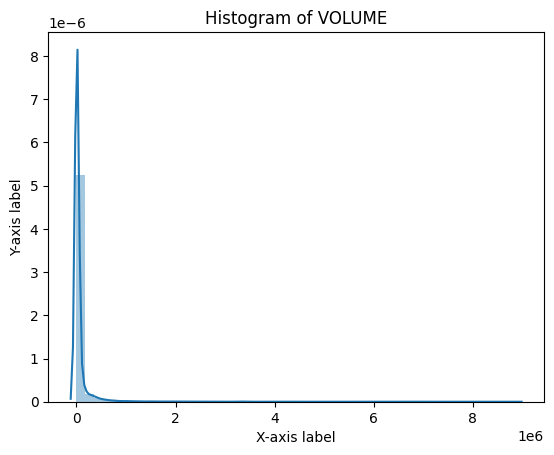

Number of outliers BEFORE: 332


<ipython-input-18-492c5bccf5c4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


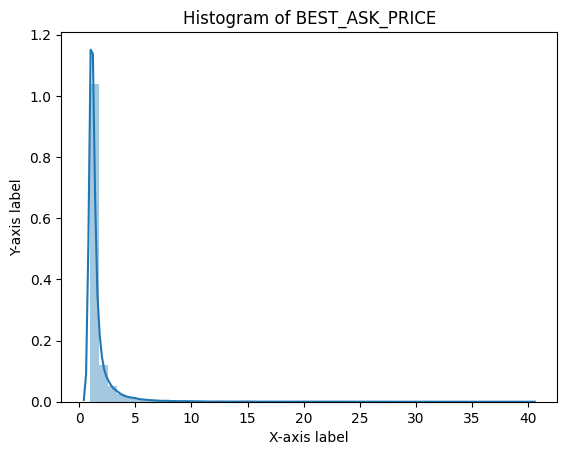

Number of outliers BEFORE: 467


<ipython-input-18-492c5bccf5c4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


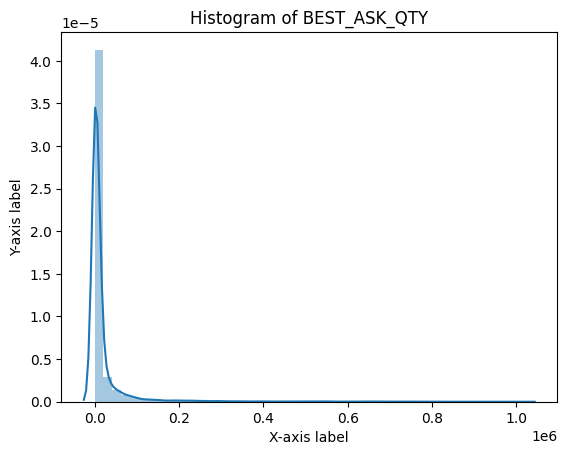

Number of outliers BEFORE: 542


<ipython-input-18-492c5bccf5c4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


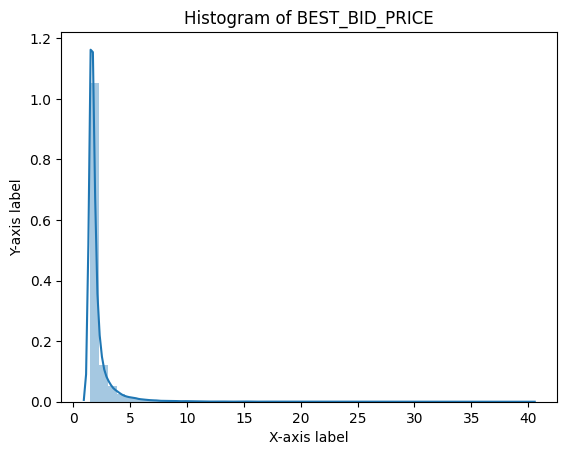

Number of outliers BEFORE: 467


<ipython-input-18-492c5bccf5c4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


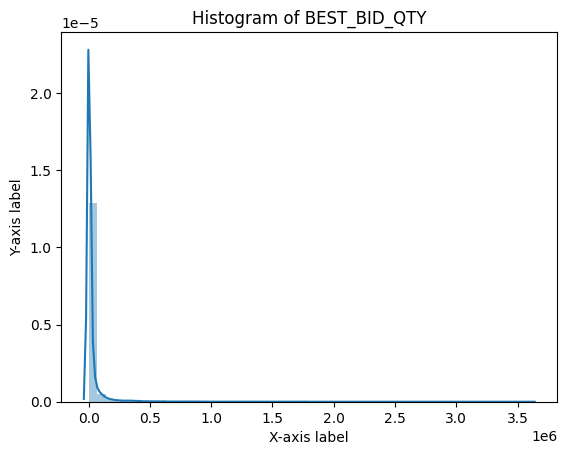

Number of outliers BEFORE: 428


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()
    df['z_score'] = (df[col] - mean) / std
    df['outlier_zscore'] = df['z_score'] > 3
    outliers_zscore = df[df['outlier_zscore'] == True]
    return outliers_zscore

def outlier(df, col):
    outliers_zscore = calculate_outliers(df, col)
    number_of_outliers_zscore = len(outliers_zscore)

    # Plotting the histogram
    sns.distplot(df[col], kde=True)
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Histogram of ' + col)
    plt.show()

    return number_of_outliers_zscore


print("Number of outliers BEFORE:", outlier(Stock_Bulletins_high, 'TRADE_QTY'))
print("Number of outliers BEFORE:", outlier(Stock_Bulletins_high, 'VOLUME'))
print("Number of outliers BEFORE:", outlier(Stock_Bulletins_high, 'BEST_ASK_PRICE'))
print("Number of outliers BEFORE:", outlier(Stock_Bulletins_high, 'BEST_ASK_QTY'))
print("Number of outliers BEFORE:", outlier(Stock_Bulletins_high, 'BEST_BID_PRICE'))
print("Number of outliers BEFORE:", outlier(Stock_Bulletins_high, 'BEST_BID_QTY'))

<ipython-input-19-bf75f74ae16f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


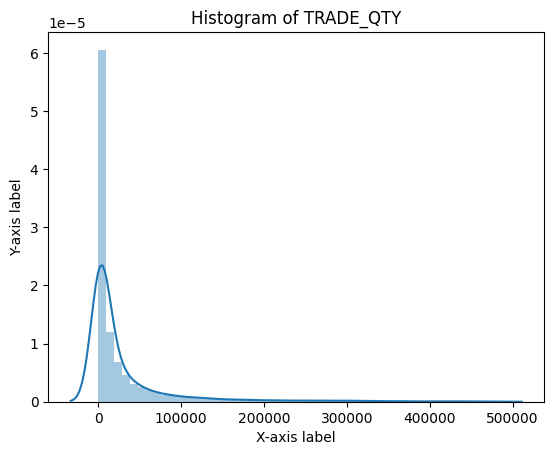

Number of outliers AFTER: 0


<ipython-input-19-bf75f74ae16f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


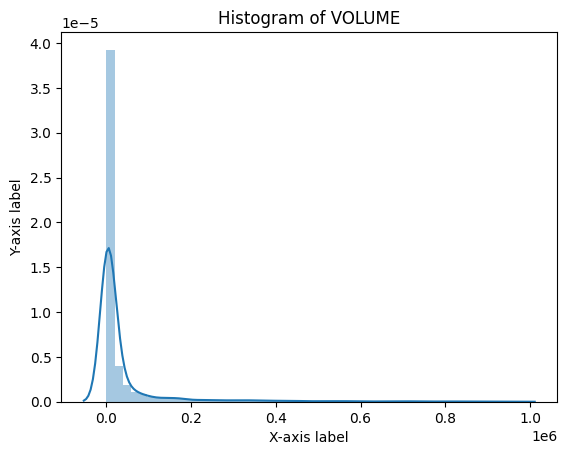

Number of outliers AFTER: 0


<ipython-input-19-bf75f74ae16f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


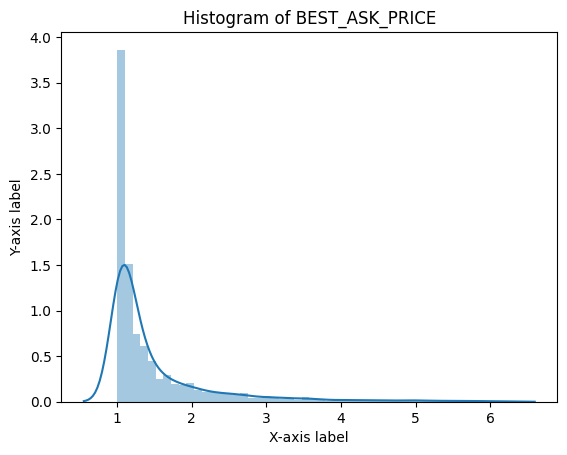

Number of outliers AFTER: 0


<ipython-input-19-bf75f74ae16f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


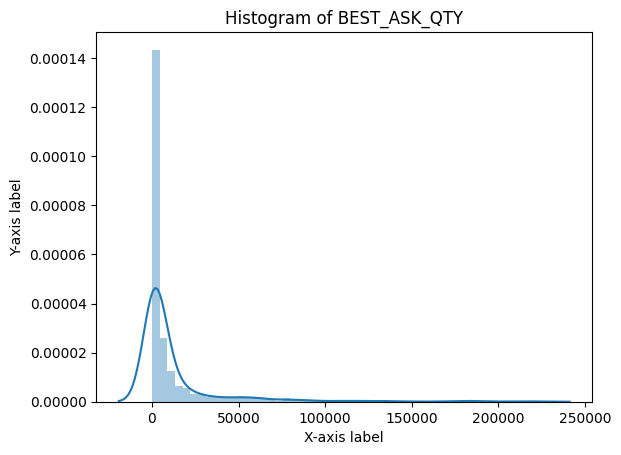

Number of outliers AFTER: 0


<ipython-input-19-bf75f74ae16f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


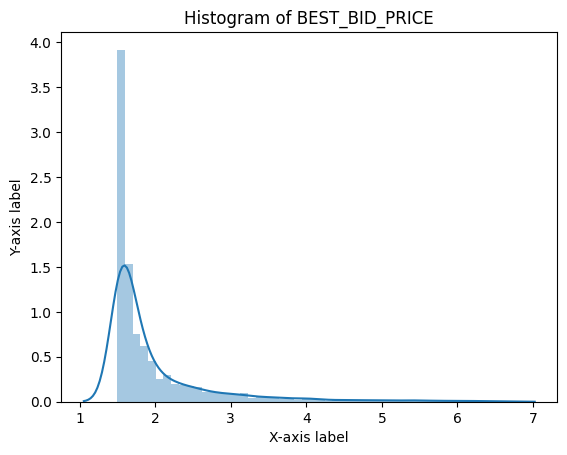

Number of outliers AFTER: 0


<ipython-input-19-bf75f74ae16f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


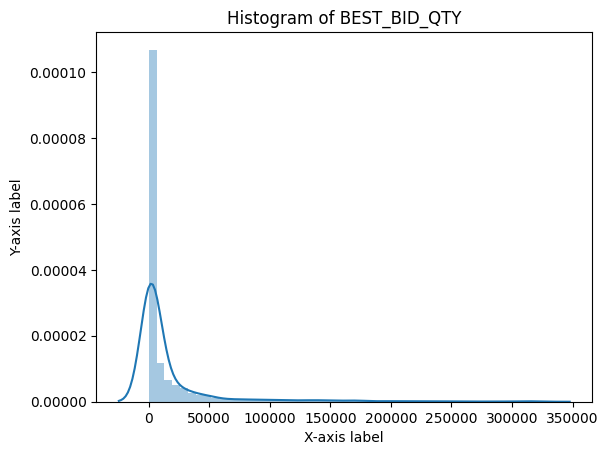

Number of outliers AFTER: 0


In [ ]:
def drop_outlier(df, col):
    outliers_zscore = calculate_outliers(df, col)
    df = df.drop(outliers_zscore.index)
    df['outlier_zscore'] = df['z_score'] > 3
    outliers_zscore = df[df['outlier_zscore'] == True]
    number_of_outliers_zscore = len(outliers_zscore)

    # Plotting the histogram
    sns.distplot(df[col], kde=True)
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Histogram of ' + col)
    plt.show()

    return number_of_outliers_zscore


print("Number of outliers AFTER:", drop_outlier(Stock_Bulletins_high, 'TRADE_QTY'))
print("Number of outliers AFTER:", drop_outlier(Stock_Bulletins_high, 'VOLUME'))
print("Number of outliers AFTER:", drop_outlier(Stock_Bulletins_high, 'BEST_ASK_PRICE'))
print("Number of outliers AFTER:", drop_outlier(Stock_Bulletins_high, 'BEST_ASK_QTY'))
print("Number of outliers AFTER:", drop_outlier(Stock_Bulletins_high, 'BEST_BID_PRICE'))
print("Number of outliers AFTER:", drop_outlier(Stock_Bulletins_high, 'BEST_BID_QTY'))


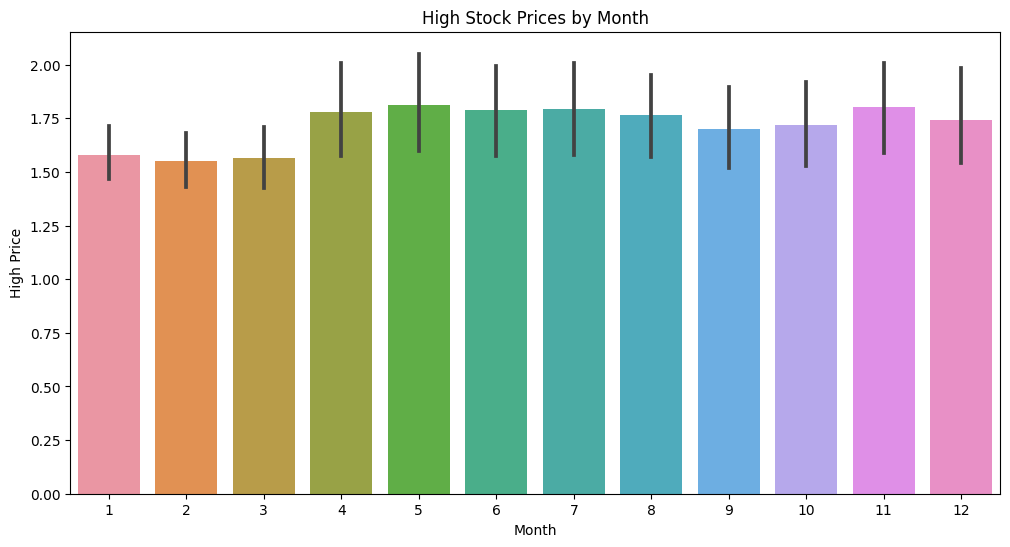

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Stock_Bulletins_high.index.month, y=Stock_Bulletins_high['HIGH'])
plt.title('High Stock Prices by Month')
plt.xlabel('Month')
plt.ylabel('High Price')
plt.show()


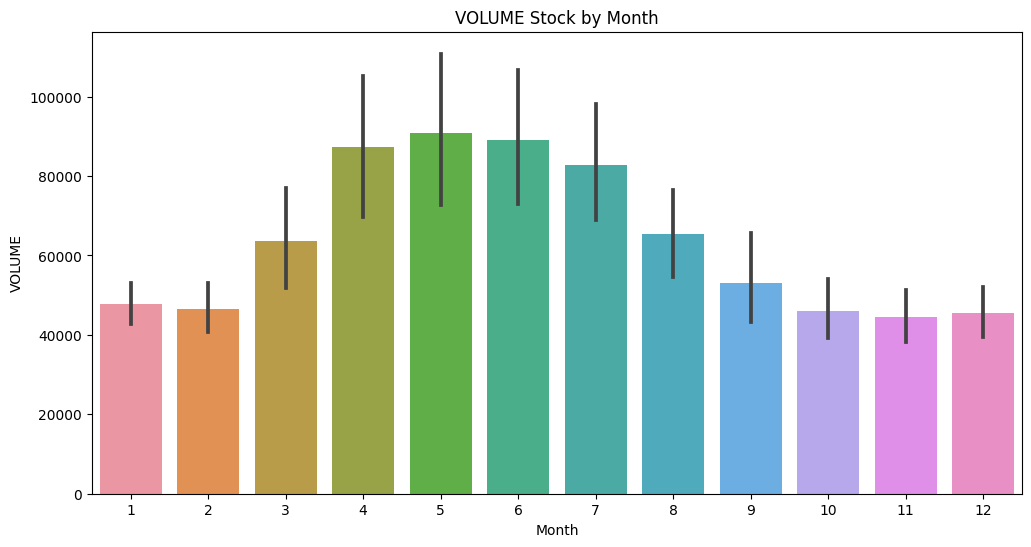

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Stock_Bulletins_high.index.month, y=Stock_Bulletins_high['VOLUME'])
plt.title('VOLUME Stock by Month')
plt.xlabel('Month')
plt.ylabel('VOLUME')
plt.show()


# **Contingency Table**

In [ ]:
contingency_table = pd.crosstab(
    index=Stock_Bulletins_high['SYMBOL1'],
    columns=Stock_Bulletins_high['MARKET'],
    margins=True
)
sorted_table = contingency_table.sort_values(by='All', ascending=True)
sorted_table

MARKET,0,1,2,All
SYMBOL1,,,,
HIMM,1,0,0,1
DMAN,0,0,1,1
MEHC,1,0,0,1
ALFA,0,0,1,1
JPTD,2,0,0,2
...,...,...,...,...
JOPT,0,247,0,247
JOEP,0,247,0,247
JOIB,0,247,0,247


# **HIGH (SelectKBest method)**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Stock_Bulletins_high['SYMBOL1'] = label_encoder.fit_transform(Stock_Bulletins_high['SYMBOL1'])

In [ ]:
Results = {}

In [ ]:
X = Stock_Bulletins_high.drop(['HIGH','BEST_ASK_PRICE','BEST_BID_PRICE','outlier_zscore'], axis=1)
y = Stock_Bulletins_high['HIGH']

### **Linear Regression (LR)**

In [ ]:
# SelectKBest method
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

lstResults = []

for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)

# Convert the results to a DataFrame
H_LR_KB = pd.DataFrame(lstResults)
print("MAE", round(H_LR_KB['MAE'].mean(),3))
print('MSE', round(H_LR_KB['MSE'].mean(),3))
print('RMSE',round(H_LR_KB['RMSE'].mean(),3))
print('R2', round(H_LR_KB['R2'].mean(),3))
Results['Linear Regression KBest'] = {'MSE': round(H_LR_KB['MSE'].mean(),3),'R2': round(H_LR_KB['R2'].mean(),3)}

Results['Linear Regression KBest']


Selected features: Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 1.645
MSE 19.321
RMSE 4.394
R2 0.119


{'MSE': 19.321, 'R2': 0.119}

### **K-Nearest Neighbors Regressor (KNNR)**

In [ ]:
# SelectKBest method
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

lstResults = []

for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = KNeighborsRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)


# Convert the results to a DataFrame
H_KNNR_KB = pd.DataFrame(lstResults)
print("MAE", round(H_KNNR_KB['MAE'].mean(),3))
print('MSE', round(H_KNNR_KB['MSE'].mean(),3))
print('RMSE',round(H_KNNR_KB['RMSE'].mean(),3))
print('R2', round(H_KNNR_KB['R2'].mean(),3))

Results['K-Nearest Neighbors Regressor KBest']={'MSE': round(H_KNNR_KB['MSE'].mean(),3),'R2': round(H_KNNR_KB['R2'].mean(),3)}
Results['K-Nearest Neighbors Regressor KBest']

Selected features: Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 0.767
MSE 7.268
RMSE 2.694
R2 0.668


{'MSE': 7.268, 'R2': 0.668}

### **Decision Tree Regression (DTR)**

In [ ]:
# SelectKBest method
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


lstResults = []

for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)


# Convert the results to a DataFrame
H_DTR_KB = pd.DataFrame(lstResults)
print("MAE", round(H_DTR_KB['MAE'].mean(),3))
print('MSE', round(H_DTR_KB['MSE'].mean(),3))
print('RMSE',round(H_DTR_KB['RMSE'].mean(),3))
print('R2', round(H_DTR_KB['R2'].mean(),3))



Results['Decision Tree Regression KBest']={'MSE': round(H_DTR_KB['MSE'].mean(),3), 'R2': round(H_DTR_KB['R2'].mean(),3)}
Results['Decision Tree Regression KBest']

Selected features: Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 0.291
MSE 2.142
RMSE 1.456
R2 0.902


{'MSE': 2.142, 'R2': 0.902}

# **HIGH Sequential**

In [ ]:
X = Stock_Bulletins_high.drop(['HIGH','BEST_ASK_PRICE','BEST_BID_PRICE','outlier_zscore'], axis=1)
y = Stock_Bulletins_high['HIGH']

### **Linear Regression (LR)**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward') #backward
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

lstResults = []
for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)


# Convert the results to a DataFrame
H_LR_SQ = pd.DataFrame(lstResults)
print("MAE", round(H_LR_SQ['MAE'].mean(),3))
print('MSE', round(H_LR_SQ['MSE'].mean(),3))
print('RMSE',round(H_LR_SQ['RMSE'].mean(),3))
print('R2', round(H_LR_SQ['R2'].mean(),3))

Results['Linear Regression Sequential'] = {'MSE': round(H_LR_SQ['MSE'].mean(), 3), 'R2': round(H_LR_SQ['R2'].mean(), 3)}
Results['Linear Regression Sequential']


Selected features: Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')
MAE 1.632
MSE 18.059
RMSE 4.248
R2 0.177


{'MSE': 18.059, 'R2': 0.177}

### **K-Nearest Neighbors Regressor (KNNR)**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sfs = SequentialFeatureSelector(KNeighborsRegressor(), n_features_to_select=5, direction='forward') #backward
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

lstResults = []
for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = KNeighborsRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)


    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)


# Convert the results to a DataFrame
H_KNNR_SQ = pd.DataFrame(lstResults)
print("MAE", round(H_KNNR_SQ['MAE'].mean(),3))
print('MSE', round(H_KNNR_SQ['MSE'].mean(),3))
print('RMSE',round(H_KNNR_SQ['RMSE'].mean(),3))
print('R2', round(H_KNNR_SQ['R2'].mean(),3))

Results['K-Nearest Neighbors Regressor Sequential']={'MSE': round(H_KNNR_SQ['MSE'].mean(),3),'R2': round(H_KNNR_SQ['R2'].mean(),3)}
Results['K-Nearest Neighbors Regressor Sequential']


Selected features: Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'NO_OF_TRADES', 'z_score'], dtype='object')
MAE 0.313
MSE 2.261
RMSE 1.5
R2 0.897


{'MSE': 2.261, 'R2': 0.897}

### **Decision Tree Regression (DTR)**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sfs = SequentialFeatureSelector(DecisionTreeRegressor(), n_features_to_select=5, direction='forward') #backward
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

lstResults = []
for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X[selected_features], y, test_size=0.3, random_state=i)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

     # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)


# Convert the results to a DataFrame
H_DTR_SQ = pd.DataFrame(lstResults)
print("MAE", round(H_DTR_SQ['MAE'].mean(),3))
print('MSE', round(H_DTR_SQ['MSE'].mean(),3))
print('RMSE',round(H_DTR_SQ['RMSE'].mean(),3))
print('R2', round(H_DTR_SQ['R2'].mean(),3))

Results['Decision Tree Regression Sequential']={'MSE': round(H_DTR_SQ['MSE'].mean(),3), 'R2': round(H_DTR_SQ['R2'].mean(),3)}
Results['Decision Tree Regression Sequential']

Selected features: Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 0.249
MSE 1.654
RMSE 1.283
R2 0.925


{'MSE': 1.654, 'R2': 0.925}

In [ ]:
#Results.keys()

# **Visualization**

<ipython-input-363-9b5c3a3b13bb>:33: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)


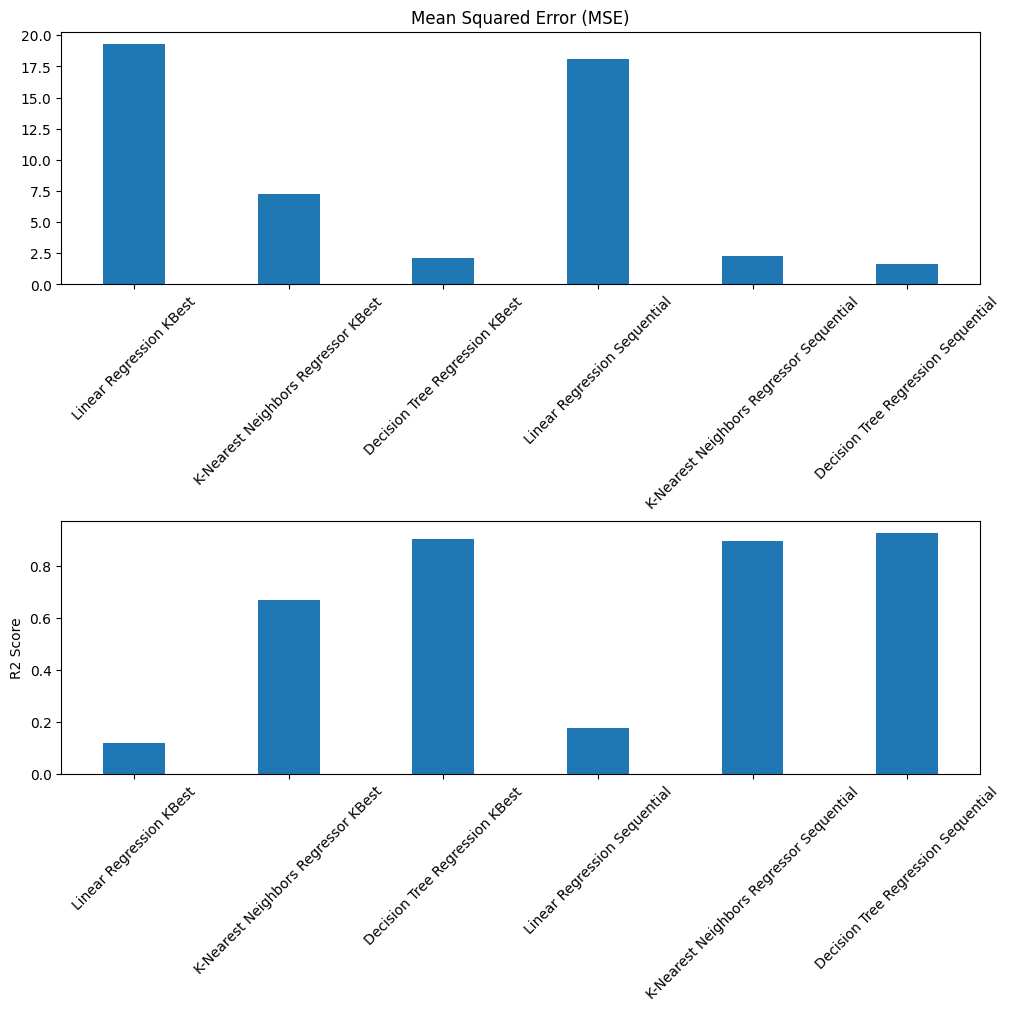

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(Results.keys())

mse_values = [Results[model]['MSE'] for model in model_names]
r2_values = [Results[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_ylabel(metric_name)

fig, axes = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

# Plot MSE values
axes[0].bar(x_pos, mse_values, width=0.4)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(model_names, rotation=45)
axes[0].set_title('Mean Squared Error (MSE)')

# Plot R2 scores
axes[1].bar(x_pos, r2_values, width=0.4)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names, rotation=45)
axes[1].set_ylabel('R2 Score')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

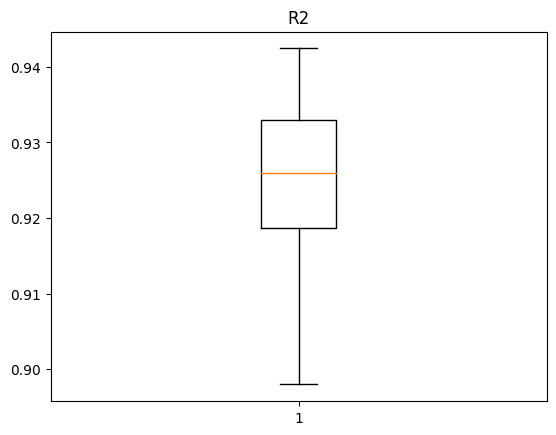

In [ ]:
plt.boxplot(H_DTR_SQ['R2'],vert=True)
plt.title('R2')
plt.show()

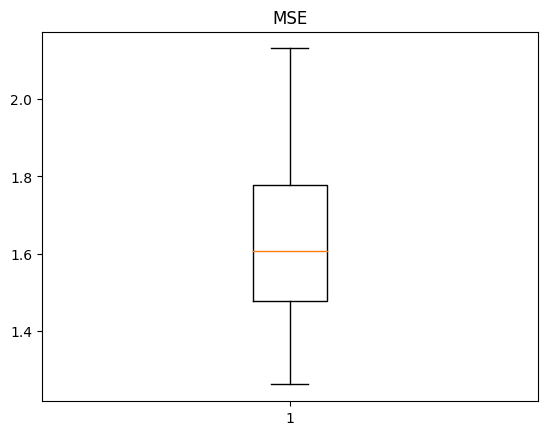

In [ ]:
plt.boxplot(H_DTR_SQ['MSE'],vert=True)
plt.title('MSE')
plt.show()

# **LOW (SelectKBest method)**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Stock_Bulletins_low['SYMBOL1'] = label_encoder.fit_transform(Stock_Bulletins_low['SYMBOL1'])
Stock_Bulletins_low['TRADE_DATE'] = label_encoder.fit_transform(Stock_Bulletins_low['TRADE_DATE'])

In [ ]:
Results = {}

In [ ]:
X = Stock_Bulletins_low.drop(['LOW','BEST_ASK_PRICE','BEST_BID_PRICE'], axis=1)
y =  Stock_Bulletins_low['LOW']

### **Linear Regression (LR)**

In [ ]:
# SelectKBest method
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


lstResults = []

for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

     # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)

# Convert the results to a DataFrame
L_LR_KB = pd.DataFrame(lstResults)
print("MAE", round(L_LR_KB['MAE'].mean(),3))
print('MSE', round(L_LR_KB['MSE'].mean(),3))
print('RMSE',round(L_LR_KB['RMSE'].mean(),3))
print('R2', round(L_LR_KB['R2'].mean(),3))


Results['Linear Regression KBest'] = {'MSE': round(L_LR_KB['MSE'].mean(), 3), 'R2': round(L_LR_KB['R2'].mean(), 3)}
Results['Linear Regression KBest']


Selected features: Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 1.619
MSE 18.694
RMSE 4.322
R2 0.116


{'MSE': 18.694, 'R2': 0.116}

### **K-Nearest Neighbors Regressor (KNNR)**

In [ ]:
# SelectKBest method
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


lstResults = []

for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = KNeighborsRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

         # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)


# Convert the results to a DataFrame
L_KNNR_KB = pd.DataFrame(lstResults)
print("MAE", round(L_KNNR_KB['MAE'].mean(),3))
print('MSE', round(L_KNNR_KB['MSE'].mean(),3))
print('RMSE',round(L_KNNR_KB['RMSE'].mean(),3))
print('R2', round(L_KNNR_KB['R2'].mean(),3))


Results['K-Nearest Neighbors Regressor KBest']={'MSE': round(L_KNNR_KB['MSE'].mean(),3),'R2': round(L_KNNR_KB['R2'].mean(),3)}
Results['K-Nearest Neighbors Regressor KBest']

Selected features: Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 0.752
MSE 7.005
RMSE 2.645
R2 0.668


{'MSE': 7.005, 'R2': 0.668}

### **Decision Tree Regression (DTR)**

In [ ]:
# SelectKBest method
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

lstResults = []

for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)

# Convert the results to a DataFrame
L_DTR_KB = pd.DataFrame(lstResults)
print("MAE", round(L_DTR_KB['MAE'].mean(),3))
print('MSE', round(L_DTR_KB['MSE'].mean(),3))
print('RMSE',round(L_DTR_KB['RMSE'].mean(),3))
print('R2', round(L_DTR_KB['R2'].mean(),3))


Results['Decision Tree Regression KBest']={'MSE': round(L_DTR_KB['MSE'].mean(),3), 'R2': round(L_DTR_KB['R2'].mean(),3)}
Results['Decision Tree Regression KBest']

Selected features: Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')
MAE 0.285
MSE 2.076
RMSE 1.434
R2 0.901


{'MSE': 2.076, 'R2': 0.901}

# **LOW Sequential**

In [ ]:
X = Stock_Bulletins_low.drop(['LOW','BEST_ASK_PRICE','BEST_BID_PRICE'], axis=1)
y = Stock_Bulletins_low['LOW']

### **Linear Regression (LR)**

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward') #backward
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

lstResults = []
for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)

# Convert the results to a DataFrame
L_LR_SQ = pd.DataFrame(lstResults)
print("MAE", round(L_LR_SQ['MAE'].mean(),3))
print('MSE', round(L_LR_SQ['MSE'].mean(),3))
print('RMSE',round(L_LR_SQ['RMSE'].mean(),3))
print('R2', round(L_LR_SQ['R2'].mean(),3))

Results['Linear Regression sequential'] = {'MSE': round(L_LR_SQ['MSE'].mean(), 3), 'R2': round(L_LR_SQ['R2'].mean(), 3)}
Results['Linear Regression sequential']


Selected features: Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')
MAE 1.606
MSE 17.504
RMSE 4.182
R2 0.172


{'MSE': 17.504, 'R2': 0.172}

### **K-Nearest Neighbors Regressor (KNNR)**

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward') #backward
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

lstResults = []
for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = KNeighborsRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

   # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)

# Convert the results to a DataFrame
L_KNNR_SQ = pd.DataFrame(lstResults)
print("MAE", round(L_KNNR_SQ['MAE'].mean(),3))
print('MSE', round(L_KNNR_SQ['MSE'].mean(),3))
print('RMSE',round(L_KNNR_SQ['RMSE'].mean(),3))
print('R2', round(L_KNNR_SQ['R2'].mean(),3))

Results['K-Nearest Neighbors Regressor sequential']={'MSE': round(L_KNNR_SQ['MSE'].mean(),3),'R2': round(L_KNNR_SQ['R2'].mean(),3)}
Results['K-Nearest Neighbors Regressor sequential']


Selected features: Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')
MAE 0.174
MSE 0.84
RMSE 0.915
R2 0.96


{'MSE': 0.84, 'R2': 0.96}

### **Decision Tree Regression (DTR)**

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward') #backward
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

lstResults = []
for i in range(30):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
       X[selected_features], y, test_size=0.3, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_test_scaled = scaler.transform(X_test_split)

    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train_split)

    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test_split, y_pred),
               'MSE': mean_squared_error(y_test_split, y_pred),
               'RMSE': mean_squared_error(y_test_split, y_pred, squared=False),
               'R2': r2_score(y_test_split, y_pred)}
    lstResults.append(metrics)

# Convert the results to a DataFrame
L_DTR_SQ = pd.DataFrame(lstResults)
print("MAE", round(L_DTR_SQ['MAE'].mean(),3))
print('MSE', round(L_DTR_SQ['MSE'].mean(),3))
print('RMSE',round(L_DTR_SQ['RMSE'].mean(),3))
print('R2', round(L_DTR_SQ['R2'].mean(),3))

Results['Decision Tree Regression sequential']={'MSE': round(L_DTR_SQ['MSE'].mean(),3), 'R2': round(L_DTR_SQ['R2'].mean(),3)}
Results['Decision Tree Regression sequential']

Selected features: Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')
MAE 0.142
MSE 0.539
RMSE 0.729
R2 0.975


{'MSE': 0.539, 'R2': 0.975}

# **Visualization**

<ipython-input-376-9b5c3a3b13bb>:33: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)


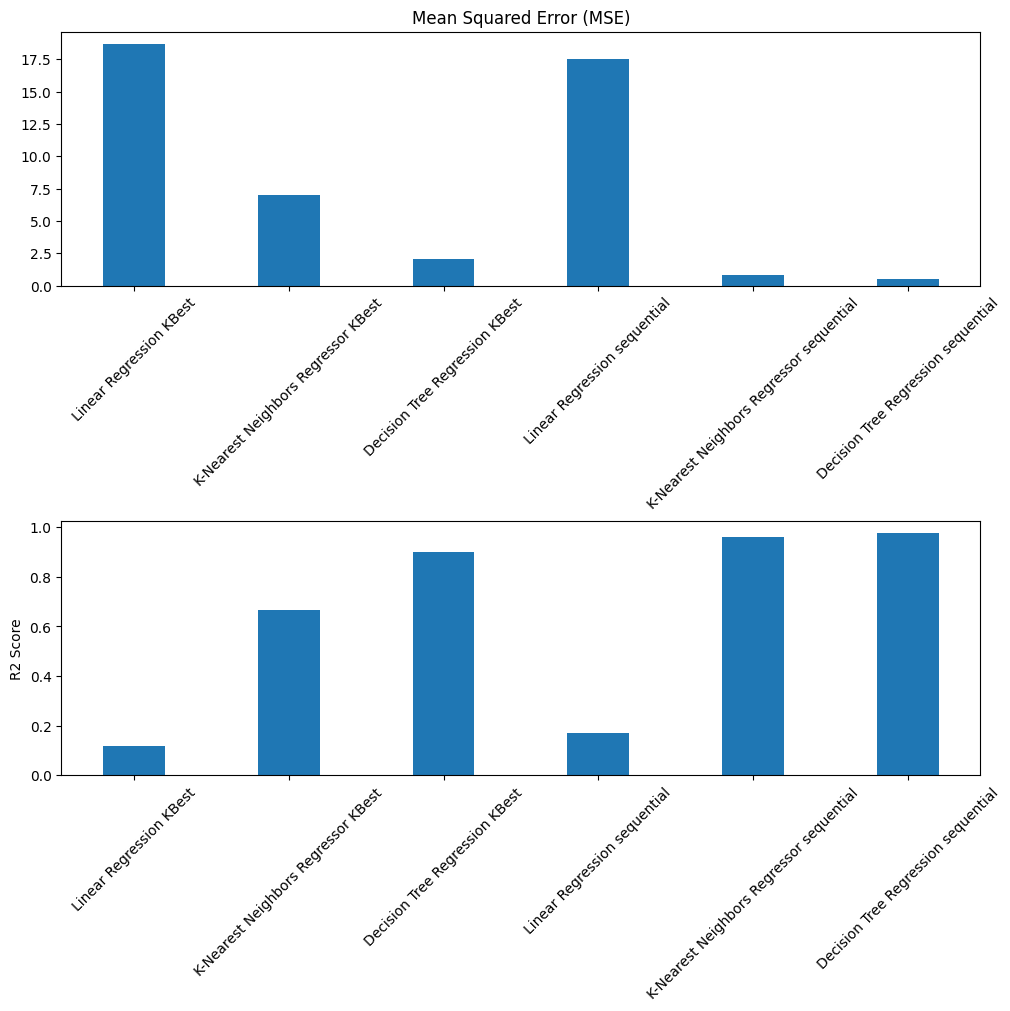

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(Results.keys())

mse_values = [Results[model]['MSE'] for model in model_names]
r2_values = [Results[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_ylabel(metric_name)

fig, axes = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

# Plot MSE values
axes[0].bar(x_pos, mse_values, width=0.4)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(model_names, rotation=45)
axes[0].set_title('Mean Squared Error (MSE)')

# Plot R2 scores
axes[1].bar(x_pos, r2_values, width=0.4)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names, rotation=45)
axes[1].set_ylabel('R2 Score')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

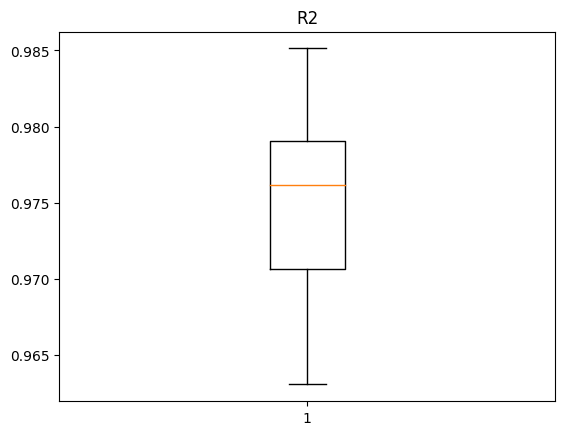

In [ ]:
plt.boxplot(L_DTR_SQ['R2'],vert=True)
plt.title('R2')
plt.show()

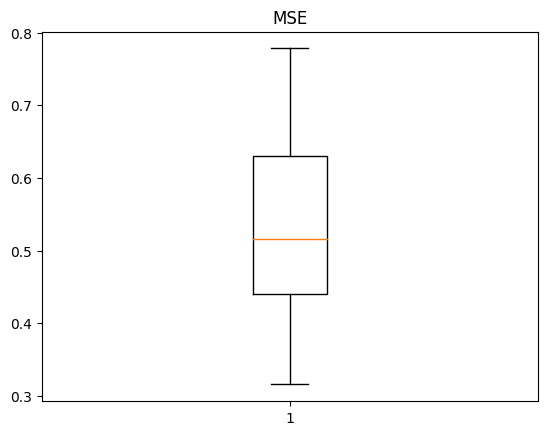

In [ ]:
plt.boxplot(L_DTR_SQ['MSE'],vert=True)
plt.title('MSE')
plt.show()